In [1]:
"""Read a sample FluxNet dataset and generate time series plot."""
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams.update({'mathtext.default': 'regular'})  # sans-serif math

In [2]:
def timestamp_parser(s):
    """A timestamp parser. Highly efficient with pandas C engine."""
    return np.datetime64('%s-%s-%sT%s:%s' %
                         (s[0:4], s[4:6], s[6:8],
                          s[8:10], s[10:12]))
# do not modify this block

# Read the data
Copy the CSV data file to the same folder of the ipython notebook file, then modify the datafile name. Change `'fluxdata_filename'` to
- BR-Sa1: `'FLX_BR-Sa1_FLUXNET2015_SUBSET_HR_2002-2011_1-3.csv'`
- NL-Loo: `'FLX_NL-Loo_FLUXNET2015_SUBSET_HH_1996-2013_1-3.csv'`
- US-MMS: `'FLX_US-MMS_FLUXNET2015_SUBSET_HR_1999-2014_1-3.csv'`
- US-Ton: `'FLX_US-Ton_FLUXNET2015_SUBSET_HH_2001-2014_1-3.csv'`

In [3]:
df_flux = pd.read_csv('fluxdata_filename', sep=',', engine='c', 
                      parse_dates=[0, 1], date_parser=timestamp_parser,
                      na_values=-9999, comment='#')

Note on the data format:
- Columns are separated by comma.
- If a comment line exists at the beginning, it usually starts with a `#`. Use `comment='#'` to ignore comment lines.
- Invalid values are represented as `-9999` since not all programming language support `NaN` (not a number) string representation.
- Timestamps are parsed simultaneously upon reading the data with the date parser defined above. Therefore no conversion is needed.

In [4]:
# check column names
# refer to the table at 
# http://fluxnet.fluxdata.org/data/fluxnet2015-dataset/subset-data-product/
print(df_flux.columns.values)

['TIMESTAMP_START' 'TIMESTAMP_END' 'TA_F' 'TA_F_QC' 'SW_IN_POT' 'SW_IN_F'
 'SW_IN_F_QC' 'LW_IN_F' 'LW_IN_F_QC' 'VPD_F' 'VPD_F_QC' 'PA_F' 'PA_F_QC'
 'P_F' 'P_F_QC' 'WS_F' 'WS_F_QC' 'WD' 'USTAR' 'RH' 'NETRAD' 'PPFD_IN'
 'CO2_F_MDS' 'CO2_F_MDS_QC' 'G_F_MDS' 'G_F_MDS_QC' 'LE_F_MDS' 'LE_F_MDS_QC'
 'LE_CORR' 'LE_CORR_25' 'LE_CORR_75' 'LE_RANDUNC' 'H_F_MDS' 'H_F_MDS_QC'
 'H_CORR' 'H_CORR_25' 'H_CORR_75' 'H_RANDUNC' 'NIGHT' 'NEE_VUT_REF'
 'NEE_VUT_REF_QC' 'NEE_VUT_REF_RANDUNC' 'NEE_VUT_25' 'NEE_VUT_50'
 'NEE_VUT_75' 'NEE_VUT_25_QC' 'NEE_VUT_50_QC' 'NEE_VUT_75_QC'
 'RECO_NT_VUT_REF' 'RECO_NT_VUT_25' 'RECO_NT_VUT_50' 'RECO_NT_VUT_75'
 'GPP_NT_VUT_REF' 'GPP_NT_VUT_25' 'GPP_NT_VUT_50' 'GPP_NT_VUT_75'
 'RECO_DT_VUT_REF' 'RECO_DT_VUT_25' 'RECO_DT_VUT_50' 'RECO_DT_VUT_75'
 'GPP_DT_VUT_REF' 'GPP_DT_VUT_25' 'GPP_DT_VUT_50' 'GPP_DT_VUT_75' 'RECO_SR'
 'RECO_SR_N']


# Datetime variable

Datetime variables can be defined as `pandas.Timestamp` format. It takes a string argument that is specifically formatted to be machine-friendly.
- Date must be given in the format of `yyyy-mm-dd`.
- The year number must be given in four digits.
- Month number and day number must have `0` padding, e.g., January 1st should be given as `01-01`.
- Time must be in 24-hour format, e.g., 3 pm must be given as `15:00` not `3:00 pm`.
- Seconds may be omitted.
- For unit smaller than one second such as microsecond or nanosecond, append decimal points. For example, `'2016-01-26 10:15:30.348235232'` is a legal timestamp.
- The smallest resolution supported is 1 nanosecond.

In [5]:
# define a subset period to look at; must be of tuple or list type
subset_period = (pd.Timestamp('2004-01-01'), pd.Timestamp('2005-01-01'))

# How to make a plot

1. Call `plt.subplots()` to generate a `figure` object and `axis` objects (essentially a plotting area, `axis` is a misnomer).
    - `nrows`: number of rows of subplots
    - `ncols`: number of columns of subplots
    - Total number of subplots is `nrows * ncols`.
    - `figsize`: figure width and heigh in inches
    - `sharex`: prescribe the same x-axis for all subplots. This is useful for time series plots.

2. Access the subplots like an array. **The array index starts from zero not one.**
    - Use `.plot()` method on an axis object to add a plot. Give it `x` and `y` arguments and plot options.
    - `'.'` means to plot data points as dots, whereas `'-'` means to plot data as a line.
    - `label` is the the name of the variable being plotted and will show up in the legend.
    - You may adjust linewidth with the parameter `linewidth` or `lw` for short.
    - Other useful arguments include: `color` for symbol/line color, `markersize` for symbol size, etc. Refer to the official documentation of `matplotlib`.

3. Use the `.legend()` method to add legends on a subplot.

4. Add x and y labels using the methods `.set_xlabel()` and `.set_ylabel()`.

5. Save the figure using the method `.savefig()`. Note that it is a method of the `figure` object, not the `axis` object.

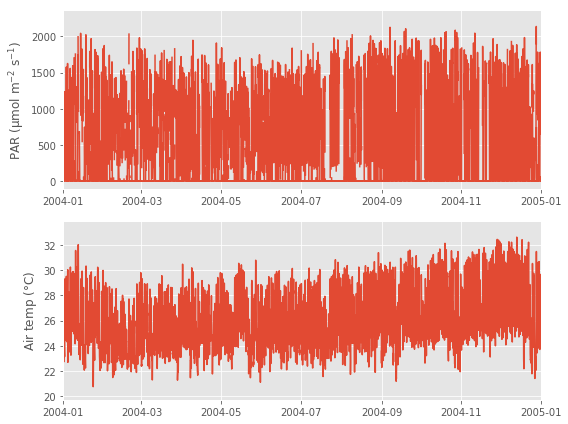

In [6]:
# figure 1: temperature and light
fig1, f1ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 6), sharex=True)
# 'sharex' option enforces the same x axis. useful for time series plots

# light (PPFD_IN)
f1ax[0].plot(df_flux['TIMESTAMP_START'], df_flux['PPFD_IN'], '-', )
f1ax[0].set_ylabel('PAR ($\mu$mol m$^{-2}$ s$^{-1}$)')

plt.setp(f1ax[0].get_xticklabels(), visible=True)
# explicitly enable x-ticklabels, otherwise only the bottom panel has them

# air temp (TA_F)
f1ax[1].plot(df_flux['TIMESTAMP_START'], df_flux['TA_F'], '-', )
f1ax[1].set_ylabel('Air temp ($\degree$C)')

# limit the time range
f1ax[1].set_xlim(subset_period)

fig1.tight_layout()  # make subpanels more compact and nicer
# fig1.savefig('./met_var_light_temp.png', dpi=300)  # uncomment to save the figure

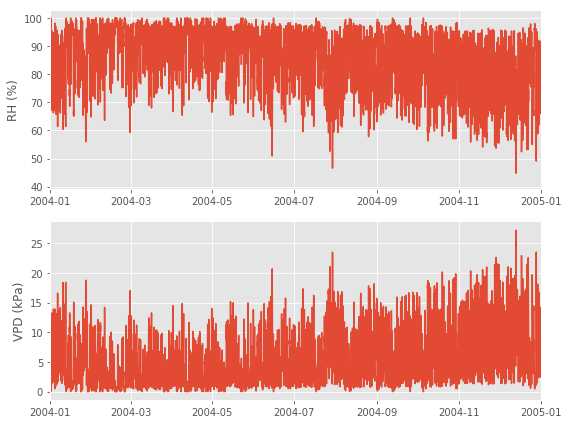

In [7]:
# figure 2: relative humidity and VPD
fig2, f2ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 6), sharex=True)
# 'sharex' option enforces the same x axis. useful for time series plots

# relative humidity (PPFD_IN)
f2ax[0].plot(df_flux['TIMESTAMP_START'], df_flux['RH'], '-', )
f2ax[0].set_ylabel('RH (%)')
plt.setp(f2ax[0].get_xticklabels(), visible=True)

# vapor pressure deficit (VPD_F)
f2ax[1].plot(df_flux['TIMESTAMP_START'], df_flux['VPD_F'], '-', )
f2ax[1].set_ylabel('VPD (kPa)')

# limit the time range to the subset
f2ax[1].set_xlim(subset_period)

fig2.tight_layout()  # make subpanels more compact and nicer

# fig2.savefig('./met_var_rh_vpd.png', dpi=300)  # uncomment to save the figure

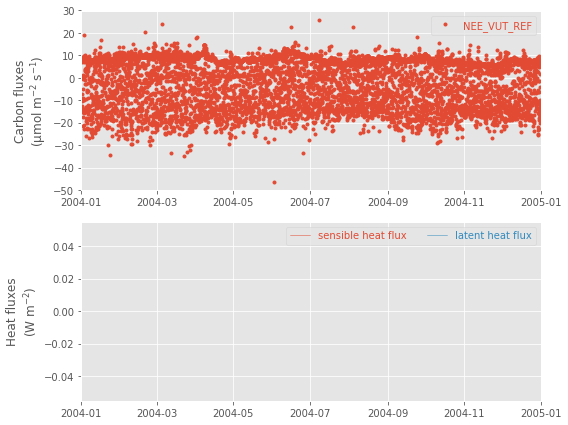

In [8]:
# figure 3: NEE and heat flux
# note that heat flux variables are not always available
fig3, f3ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 6), sharex=True)

# first panel
f3ax[0].plot(df_flux['TIMESTAMP_START'], df_flux['NEE_VUT_REF'], '.')
plt.setp(f3ax[0].get_xticklabels(), visible=True, label='NEE')

# second panel
f3ax[1].plot(df_flux['TIMESTAMP_START'], df_flux['H_CORR'],
             '-', lw=0.5, label='sensible heat flux')
f3ax[1].plot(df_flux['TIMESTAMP_START'], df_flux['LE_CORR'],
             '-', lw=0.5, label='latent heat flux')

# limit the time range to the subset
f3ax[1].set_xlim(subset_period)

# if there are multiple variables on one panel
# use legends to distinguish them
for i in range(len(f3ax)):
    lgnd = f3ax[i].legend(loc='best', frameon=True, fontsize=10, ncol=4)
    for k, lgnd_text in enumerate(lgnd.get_texts()):
        lgnd_text.set_color(plt.rcParams['axes.prop_cycle'].by_key()['color'][k])

# axis labels
f3ax[0].set_ylabel('Carbon fluxes\n($\mu$mol m$^{-2}$ s$^{-1}$)')
f3ax[1].set_ylabel('Heat fluxes\n(W m$^{-2}$)')

fig3.tight_layout()

# fig3.savefig('./flux_var.png', dpi=300)  # uncomment to save the figure

# Plot flux variables against biomet variables

In [9]:
# create some convenient aliases
timestamp = df_flux['TIMESTAMP_START'].values
T_atm = df_flux['TA_F'].values
PAR = df_flux['PPFD_IN'].values
u_star = df_flux['USTAR'].values
NEE = df_flux['NEE_VUT_REF'].values
daytime_indicator = ~(df_flux['NIGHT'].values.astype('bool'))

**Use boolean-type index array for selection**

The `daytime_indicator` is a boolean type array that has `True` and `False` values. `True` means daytime, and `False` means nighttime.

The operator '~' is the bitwise logical NOT. It works for boolean arrays. However, if you have an integer array (even if with only 0 and 1), bitwise logical NOT operator may not work the way we expected, thus the integer array must be cast as a boolean array using the method `.astype('bool')`.

**Special note on Python assignment operator**

The assignment operator '=' does not work the same way as C-family languages (C, C++, Java, etc.). It links the variable name on the lefthand side with the value on the righthand side. Roughly speaking, if the righthand side is a variable that already exists, the lefthand side is not going to be a newly created variable, but merely a **reference** to the variable on the righthand side.

In this case, if you change an element in `T_atm`, you'll also change the corresponding element in `df_flux_subset` and `df_flux`.

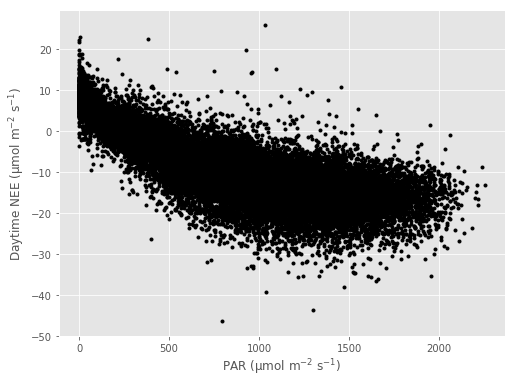

In [10]:
fig4, f4ax = plt.subplots(1, 1, figsize=(8, 6))
# Note that with only one subplot panel defined, `f4ax` is an `axis` object,
# no longer an array of multiple `axis` objects

f4ax.plot(PAR[daytime_indicator], NEE[daytime_indicator], 'k.')
f4ax.set_xlabel('PAR ($\mu$mol m$^{-2}$ s$^{-1}$)')
f4ax.set_ylabel('Daytime NEE ($\mu$mol m$^{-2}$ s$^{-1}$)')

# fig4.savefig('nee_vs_par.png', dpi=300)  # uncomment to save the figure

# Linear regression

The most convenient linear regression function is `scipy.stats.linregress()`. It takes two array `x` and `y` as arguments, and return five values:
- `slope`
- `intercept`
- `rvalue`: Pearson correlation
- `pvalue`: p-value
- `stderr`: Standard error of the estimated slope

This function has a shortcoming --- it cannot deal with missing data in the input. To deal with missing data, we define a customized function `nan_linregress()`. In this function, we first extract all the data with finite values, and then perform the linear regression. This is safer than the original function `scipy.stats.linregress()`.

In [11]:
def nan_linregress(x, y):
    """Same as `scipy.stats.linregress`, but able to deal with NaN values."""
    x_finite = x[np.isfinite(x) & np.isfinite(y)]
    y_finite = y[np.isfinite(x) & np.isfinite(y)]
    return stats.linregress(x_finite, y_finite)

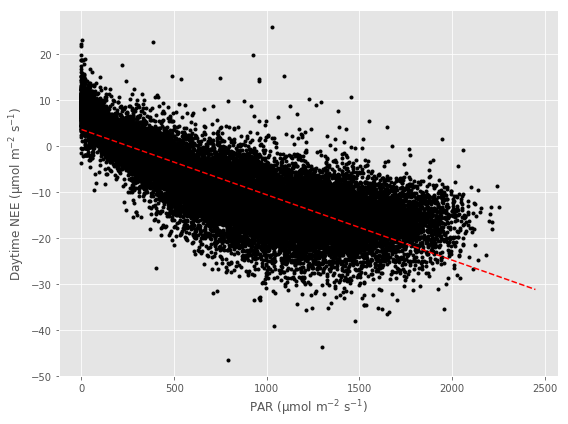

In [12]:
fig5, f5ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

f5ax.plot(PAR[daytime_indicator], NEE[daytime_indicator], 'k.')
linfit_NEE_PAR = nan_linregress(PAR[daytime_indicator], NEE[daytime_indicator])
f5ax.plot(np.arange(0, 2500, 50), 
                np.arange(0, 2500, 50) * linfit_NEE_PAR.slope + linfit_NEE_PAR.intercept,
               'r--', lw=1.5, label='linear fit')
f5ax.set_xlabel('PAR ($\mu$mol m$^{-2}$ s$^{-1}$)')
f5ax.set_ylabel('Daytime NEE ($\mu$mol m$^{-2}$ s$^{-1}$)')

fig5.tight_layout()

# fig5.savefig('nee_vs_par_linregress.png', dpi=300)  # uncomment to save the figure

# Subsetting using a PAR criterion

Extract data when there is sufficient light. Let's take `PAR >= 500` as the criterion.

Use the `.query()` method of `pandas.DataFrame` to perform the subsetting. Note that the PAR variable in the original dataset was named as `'PPFD_IN'`. We specify `'PPDF_IN >= 500'` as the condition of the query. The condition must be given as a string.

In [13]:
df_flux_subset_PAR = df_flux.query('PPFD_IN >= 500')

Let's make sure it has extracted the data the way we want. Use the `.describe()` method to print a summary.

In [14]:
df_flux_subset_PAR['PPFD_IN'].describe()

count    16699.000000
mean      1137.165267
std        375.604456
min        500.194000
25%        820.027500
50%       1130.770000
75%       1422.425000
max       2254.390000
Name: PPFD_IN, dtype: float64

The linear regression line is described as:
 LinregressResult(slope=-0.00716543743345858, intercept=-5.2522678203294166, rvalue=-0.45218190659161228, pvalue=0.0, stderr=0.00010938027242001119)


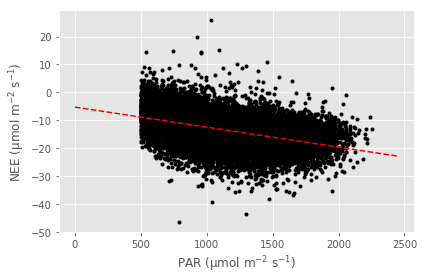

In [15]:
fig6, f6ax = plt.subplots(1, 1)
f6ax.plot(df_flux_subset_PAR['PPFD_IN'], df_flux_subset_PAR['NEE_VUT_REF'], 'k.')
linfit_NEE_PAR2 = nan_linregress(df_flux_subset_PAR['PPFD_IN'].values,
                                 df_flux_subset_PAR['NEE_VUT_REF'].values)
print('The linear regression line is described as:\n', linfit_NEE_PAR2)

f6ax.plot(np.arange(0, 2500, 50), 
          np.arange(0, 2500, 50) * linfit_NEE_PAR2.slope + linfit_NEE_PAR2.intercept,
          'r--', lw=1.5)
f6ax.set_xlabel('PAR ($\mu$mol m$^{-2}$ s$^{-1}$)')
f6ax.set_ylabel('NEE ($\mu$mol m$^{-2}$ s$^{-1}$)')

fig6.tight_layout()

# fig6.savefig('nee_vs_par_subsetted.png', dpi=300)  # uncomment to save the figure